In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
sns.set()
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
import xgboost as xgb
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import svm
import pandas as pd
from geopy.distance import distance
from geopy.distance import geodesic
import xlsxwriter
import numpy as np
import datetime
from scipy import stats
from sqlalchemy import create_engine
from datetime import date,timedelta
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler,RobustScaler,normalize
import os
import warnings
import time
warnings.filterwarnings("ignore")

### Overview of the Imported Libraries and Initial Setup

This code begins by importing essential libraries for handling imbalanced datasets, creating machine learning pipelines, and generating interactive plots:

1.  **Imbalanced Data Handling**: The `imblearn` package provides tools like `SMOTE` (Synthetic Minority Over-sampling Technique) and `ADASYN` (Adaptive Synthetic Sampling) for oversampling minority classes, addressing class imbalance in datasets.
    
2.  **Plotting**: Plotly is used for creating interactive visualizations. The notebook initializes Plotly in offline mode to render plots directly within the notebook, avoiding the need for internet access.
    
3.  **Configurations**:
    
    *   A random seed (`SEED = 17`) is set for reproducibility of results.
    *   Pandas is configured to display all columns of a DataFrame without abbreviation, ensuring complete visibility of the data structure during analysis.

These initial steps establish the foundation for subsequent data processing, modeling, and visualization tasks within the notebook.

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

# online plotly
#from plotly.plotly import plot, iplot
#plotly.tools.set_credentials_file(username='XXXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXXX')

# offline plotly
from plotly.offline import plot, iplot

SEED = 17 # specify seed for reprodufinal_reportle results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

### Explanation of Model Hyperparameter Grids

This section defines hyperparameter grids for various machine learning classifiers. These grids are used to explore different combinations of hyperparameters during model tuning, typically with techniques like Grid Search or Random Search, to identify the best parameters for optimal model performance.

1.  **Random Forest Parameters (`RANDOM_FOREST_PARAMS`)**:
    
    *   `clf__max_depth`: Specifies the maximum depth of the trees in the forest. Values of 25, 50, and 75 are considered, controlling the complexity of the trees.
    *   `clf__max_features`: Set to "sqrt," which means the number of features considered for splitting at each node is the square root of the total number of features. This is chosen because it provides a balance between computational efficiency and model performance, especially when the number of features is between 10-19.
    *   `clf__criterion`: Specifies the function to measure the quality of a split, with options 'gini' (Gini impurity) and 'entropy' (information gain).
    *   `clf__n_estimators`: Specifies the number of trees in the forest, with options 100, 300, 500, and 1000, allowing the model to explore the effect of the number of trees on performance.
2.  **Decision Tree Parameters (`DECISION_TREE_PARAMS`)**:
    
    *   Similar to the Random Forest parameters, with additional options:
    *   `clf__min_samples_split`: Determines the minimum number of samples required to split an internal node, with values of 6, 10, and 14. This controls the growth of the tree by setting a threshold for node splitting, impacting the depth and complexity of the tree.
3.  **Logistic Regression Parameters (`LOGISTIC_REGRESSION_PARAMS`)**:
    
    *   `clf__solver`: Set to 'liblinear', a solver suitable for small datasets and `l1` or `l2` penalty types.
    *   `clf__C`: Specifies the inverse of regularization strength, with values 0.1, 1, and 10. Smaller values specify stronger regularization, affecting the model's complexity and generalization ability.
    *   `clf__penalty`: Regularization type with 'l2' (Ridge) and 'l1' (Lasso), influencing the impact of regularization on model weights.
4.  **K-Nearest Neighbors (KNN) Parameters (`KNN_PARAMS` and `KNN_PARAMS_UNIFORM`)**:
    
    *   `clf__n_neighbors`: Specifies the number of neighbors to use for classification, with a range from 5 to 65 in steps of 10.
    *   `clf__weights`: Options 'uniform' (equal weight to all neighbors) and 'distance' (closer neighbors have more influence), affecting how the classification decision is made.
    *   `clf__p`: Defines the distance metric with values 1 (Manhattan distance), 2 (Euclidean distance), and 10 (Minkowski distance), which adjusts how the distance between points is calculated.
5.  **Support Vector Machine (SVM) Parameters (`SVM_PARAMS`)**:
    
    *   The parameters are divided into two dictionaries for different kernel types:
        *   **Linear Kernel**:
            *   `clf__kernel`: Set to 'linear', meaning the decision boundary is a straight line.
            *   `clf__C`: Controls the regularization strength, with values 0.1, 1, and 10, influencing how tolerant the model is to misclassifications.
        *   **Radial Basis Function (RBF) Kernel**:
            *   `clf__kernel`: Set to 'rbf', a non-linear kernel that maps samples into higher-dimensional space.
            *   `clf__C`: A broader range of values from 0.01 to 100 is considered, exploring the impact of regularization strength.
            *   `clf__gamma`: Specifies the kernel coefficient, controlling the influence of individual training samples. A lower value means a wider influence, while a higher value focuses more narrowly on individual points.

These parameter grids provide a comprehensive set of hyperparameters for each model, enabling robust model tuning to optimize performance based on the characteristics of the dataset.

In [3]:
RANDOM_FOREST_PARAMS = {
    'clf__max_depth': [25, 50, 75],
    'clf__max_features': ["sqrt"], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19) 
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [100, 300, 500, 1000]
}

DECISION_TREE_PARAMS = {
    'clf__max_depth': [25, 50, 75],
    'clf__max_features': ["sqrt"], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19)
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [6, 10, 14],
}

LOGISTIC_REGRESSION_PARAMS = {
    'clf__solver': ['liblinear'],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2', 'l1']
}

KNN_PARAMS = {
    'clf__n_neighbors': [5, 15, 25, 35, 45, 55, 65],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2, 10]
}

KNN_PARAMS_UNIFORM = {
    'clf__n_neighbors': [5, 15, 25, 35, 45, 55, 65],
    'clf__weights': ['uniform'],
    'clf__p': [1, 2, 10]
}

SVM_PARAMS = [
{
    'clf__kernel': ['linear'],
    'clf__C': [0.1, 1, 10],
}, 
{
    'clf__kernel': ['rbf'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__gamma': [0.01, 0.1, 1, 10, 100],
}]

### importing and cleaning the dataset

In [4]:
#fraud_data = pd.read_excel('C:/Users/Snapp/Desktop/impute4.xlsx')
fraud_data = pd.read_excel('C:/Users/Snapp/Desktop/dataset2.xlsx')
print('The dataset contains {0} rows and {1} columns. '.format(fraud_data.shape[0],fraud_data.shape[1]))

The dataset contains 2310 rows and 25 columns. 


In [5]:
fraud_data.is_fraud_manuall.value_counts(normalize=True)

0    0.869697
1    0.130303
Name: is_fraud_manuall, dtype: float64

In [6]:
print(np.any(np.isnan(fraud_data)))
print(np.all(np.isfinite(fraud_data)))

False
True


In [7]:
fraud_data.isnull().sum()

order_request_id                             0
is_fraud_manuall                             0
Timesec                                      0
order_distance                               0
destination_to_next_origin_distance          0
origin_to_next_origin_distance               0
cancellation_to_next_acception_time          0
acception_to_cancellation_time               0
acception_to_acception_time                  0
biker_delivery_fare                          0
total_accepted_requests                      0
total_rides                                  0
total_cancellation                           0
cancellation_by_biker                        0
cancellation_by_customer                     0
destination_to_next2_origin_distance         0
destination_to_next3_origin_distance         0
destination_to_next4_origin_distance         0
origin_to_next2_origin_distance              0
origin_to_next3_origin_distance              0
origin_to_next4_origin_distance              0
destination_t

In [8]:
scaler = StandardScaler()
#fraud_data['normalize_amount'] = scaler.fit_transform(fraud_data['Amount'].values.reshape(-1,1))
fraud_data['scaled_time'] = scaler.fit_transform(fraud_data['Timesec'].values.reshape(-1,1))

In [9]:
data = fraud_data.drop(['Timesec','order_request_id'],axis=1)

In [10]:
data.head()

,is_fraud_manuall,order_distance,destination_to_next_origin_distance,origin_to_next_origin_distance,cancellation_to_next_acception_time,acception_to_cancellation_time,acception_to_acception_time,biker_delivery_fare,total_accepted_requests,total_rides,total_cancellation,cancellation_by_biker,cancellation_by_customer,destination_to_next2_origin_distance,destination_to_next3_origin_distance,destination_to_next4_origin_distance,origin_to_next2_origin_distance,origin_to_next3_origin_distance,origin_to_next4_origin_distance,destination_to_next_destination_distance,destination_to_next2_destination_distance,destination_to_next3_destination_distance,cans_query,scaled_time
0,0,6.363,4.057,8.210,8.150000,0.050000,8.200000,180000,2,0,2,1,1,6694,3257,5360,2589,15253,14778,3744,9359,2286,0,-0.020934
1,0,1.266,4.724,3.763,2.250000,0.066667,2.316667,155000,5,3,2,0,2,9250,22954,19554,5831,2723,5970,4564,6213,16748,0,0.660270
2,0,4.915,5.366,0.482,0.416667,0.016667,0.433333,220000,3,1,2,1,1,5509,10590,5636,2126,4401,5426,5178,9523,5329,0,-1.640024
3,0,18.322,18.970,2.616,0.633333,0.016667,0.650000,395000,5,4,1,1,0,14328,13554,8105,4436,947,812,20014,17687,889,0,0.414403
4,0,5.051,4.139,4.088,0.766667,0.000000,0.766667,225000,8,5,3,1,2,1201,1447,6190,8506,1893,7807,1191,6991,4443,0,0.960508


In [11]:
#IQR Score -for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
#print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(935, 24)

<AxesSubplot:xlabel='order_distance'>

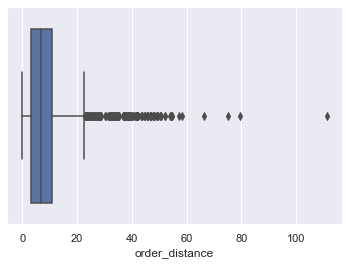

In [12]:
#Z-Score -for outlier detection
import seaborn as sns
sns.boxplot(x=data['order_distance'])

The below code iterates over each column in the specified list and performs the following:
1. Calculates the Z-score for each data point in the column using stats.zscore(), which measures how many standard deviations a data point is from the mean.
2. Filters the dataset to retain only the rows where the absolute Z-score is less than 3. This threshold of 3 is commonly used, as it typically removes data points that are more than 3 standard deviations away from the mean, which are considered outliers.

In [13]:
#outlier cleanup
from scipy import stats
import numpy as np
columns = ['order_distance',
       'destination_to_next_origin_distance', 'origin_to_next_origin_distance',
       'cancellation_to_next_acception_time', 'acception_to_cancellation_time',
       'acception_to_acception_time', 'biker_delivery_fare',
       'total_accepted_requests', 'total_rides', 'total_cancellation',
       'cancellation_by_biker', 'cancellation_by_customer',
       'destination_to_next2_origin_distance',
       'destination_to_next3_origin_distance',
       'destination_to_next4_origin_distance',
       'origin_to_next2_origin_distance', 'origin_to_next3_origin_distance',
       'origin_to_next4_origin_distance',
       'destination_to_next_destination_distance',
       'destination_to_next2_destination_distance',
       'destination_to_next3_destination_distance',
       'scaled_time']
print(data.shape)
for column in columns : 
    z = np.abs(stats.zscore(data[column]))
    data=data[(z < 3)]
data = data.reset_index(drop = True)
data.dropna(inplace =True)
print(data.shape)

(2310, 24)
(1395, 24)


<AxesSubplot:xlabel='order_distance'>

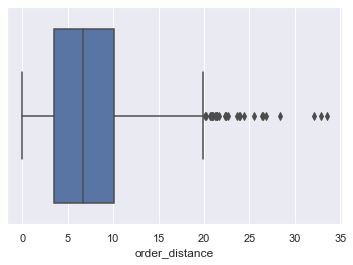

In [15]:
import seaborn as sns
sns.boxplot(x=data['order_distance'])

This below code generates a dendrogram to visualize the hierarchical clustering of features in the dataset based on their correlations. A dendrogram is a tree-like diagram that shows the arrangement of the clusters formed by hierarchical clustering.

In [16]:
from scipy.cluster import hierarchy as hc
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
X = np.random.rand(10, 10)
names = data.columns
inverse_correlation = 1 - abs(data.corr())
fig = ff.create_dendrogram(inverse_correlation.values, orientation='left', labels=names, colorscale=colors, linkagefun=lambda x: hc.linkage(x, 'average'))
fig['layout'].update(dict(
    title="Dendogram of clustering the features according to correlation",
    width=800, 
    height=600,
    margin=go.layout.Margin(l=180, r=50),
    xaxis=dict(
        title='distance',
    ),
    yaxis=dict(
        title='features',
        automargin=True,
    ),
))
iplot(fig, filename='dendrogram_corr_clustering')

In [17]:
#data = data.reset_index()
#np.any(np.isnan(df_X_normed))
#np.all(np.isfinite(df_X_normed))
#df_X_normed

Next 3 boxes perform Principal Component Analysis (PCA) on the dataset and visualize the explained variance of each principal component. PCA is a dimensionality reduction technique that transforms the data into a set of linearly uncorrelated components, which capture the most variance in the data.

In [18]:
from sklearn.decomposition import PCA
df_y = data["is_fraud_manuall"]
df_X = data.drop(["is_fraud_manuall"], axis=1)
df_X_normed = (df_X - df_X.mean()) / df_X.std()
pca = PCA(random_state=SEED)#42
df_X_pca = pca.fit_transform(df_X_normed)

In [19]:
tot = sum(pca.explained_variance_) # total explained variance of all principal components
var_exp = [(i / tot) * 100 for i in sorted(pca.explained_variance_, reverse=True)] # individual explained variance
cum_var_exp = np.cumsum(var_exp) # cumulative explained variance

In [20]:
trace_cum_var_exp = go.Bar(
    x=list(range(1, len(cum_var_exp) + 1)), 
    y=var_exp,
    name="individual explained variance",
)
trace_ind_var_exp = go.Scatter(
    x=list(range(1, len(cum_var_exp) + 1)),
    y=cum_var_exp,
    mode='lines+markers',
    name="cumulative explained variance",
    line=dict(
        shape='hv',
    ))
data = [trace_cum_var_exp, trace_ind_var_exp]
layout = go.Layout(
    title='Individual and Cumulative Explained Variance',
    autosize=True,
    yaxis=dict(
        title='percentage of explained variance',
    ),
    xaxis=dict(
        title="principal components",
        dtick=1,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

In [21]:
n_components = 10
df_X_reduced = np.dot(df_X_normed.values, pca.components_[:n_components,:].T)
df_X_reduced = pd.DataFrame(df_X_reduced, columns=["PC#%d" % (x + 1) for x in range(n_components)])

### Grid Search, Model Evaluation, and Dataset Preparation

Next 3 boxeds provide a comprehensive pipeline for performing grid search with cross-validation, scoring models on test datasets, and managing dataset preparation. They include three main functions and processes for splitting data, which are essential for optimizing and evaluating machine learning models.

#### Key Components:

1.  **Function: `print_best_grid_search_scores_with_params`** :
    
    *   **Purpose**: Prints the top `n` best scores from a fitted grid search object along with their parameters.
    *   **How it Works**:
        *   Checks if the grid search object is fitted.
        *   Sorts and retrieves the top scores based on mean test scores.
        *   Prints the mean score, a confidence interval (mean ± 2 × standard deviation), and the parameter settings for each of the top results.
2.  **Function: `do_gridsearch_with_cv`** :
    
    *   **Purpose**: Conducts grid search with cross-validation using a specified classifier and hyperparameter grid.
    *   **How it Works**:
        *   Creates a pipeline with or without SMOTE for handling class imbalance.
        *   Sets up `GridSearchCV` with the pipeline, parameters, cross-validation, and F1 scoring.
        *   Fits the model to the training data and returns the fitted grid search object.
3.  **Function: `score_on_test_set`** :
    
    *   **Purpose**: Evaluates a list of classifiers on corresponding test datasets.
    *   **How it Works**:
        *   Iterates through classifiers and test datasets, scoring each classifier on its respective test set.
        *   Returns a list of scores, representing model performance on unseen data.
4.  **Dataset Preparation**:
    
    *   **Splitting Data**
        
    *   **Purpose**: Splits the dataset into training and testing sets with an 80:20 ratio, ensuring consistency with a fixed random state.
    *   **Details**:
        *   First split: Uses the normalized full dataset (`df_X_normed`).
        *   Second split: Uses the PCA-transformed dataset (`df_X_reduced`).
        *   Prints the shapes of the training datasets to compare the full dataset and the PCA-transformed dataset (reduced dimensionality).

#### Overall Workflow:

*   These codes facilitate a robust workflow for model tuning and evaluation by optimizing hyperparameters through grid search and assessing performance with consistent train-test splits. They also handle potential class imbalance using SMOTE when needed, and evaluates models across multiple preprocessing scenarios, including dimensionality reduction via PCA.

In [22]:
# prints the best grid search scores along with their parameters.
def print_best_grid_search_scores_with_params(grid_search, n=10):
    if not hasattr(grid_search, 'best_score_'):
        raise KeyError('grid_search is not fitted.')
    print("Best grid scores on validation set:")
    indexes = np.argsort(grid_search.cv_results_['mean_test_score'])[::-1][:n]
    means = grid_search.cv_results_['mean_test_score'][indexes]
    stds = grid_search.cv_results_['std_test_score'][indexes]
    params = np.array(grid_search.cv_results_['params'])[indexes]
    for mean, std, params in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [23]:
def do_gridsearch_with_cv(clf, params, X_train, y_train, cv, smote=None):

    if smote is None:
        pipeline = Pipeline([('clf', clf)])
    else:
        pipeline = Pipeline([('sm', sm), ('clf', clf)])
        
    gs = GridSearchCV(pipeline, params, cv=kf, n_jobs=-1, scoring='f1', return_train_score=True)
    gs.fit(X_train, y_train)
    return gs

def score_on_test_set(clfs, datasets):
    scores = []
    for c, (X_test, y_test) in zip(clfs, datasets):
        scores.append(c.score(X_test, y_test))
    return scores

In [24]:
# split data into train and test set in proportion 4:1 for all differntly preprocessed datasets
X_train, X_test, y_train, y_test = train_test_split(df_X_normed, df_y, test_size=0.2, random_state=SEED)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_X_reduced, df_y, test_size=0.2, random_state=SEED)


In [25]:
print("Shape of the full train dataset:", X_train.shape)
print("Shape of the transformed train dataset using the first 4 Principal Components", X_train_pca.shape)

Shape of the full train dataset: (1116, 23)
Shape of the transformed train dataset using the first 4 Principal Components (1116, 8)


### Model Evaluation with Grid Search, Cross-Validation, and Class Balancing

These next 5 boxes perform grid search with cross-validation for Random Forest classifiers across different dataset preprocessing methods and class balancing techniques. They evaluate and compares the models using F1 scores on the test datasets.

#### Key Steps and Explanation:

1.  **Initial Setup**:
    
    *   **Define SMOTE and Cross-Validation Strategy**
        
        *   **SMOTE** (Synthetic Minority Over-sampling Technique): Handles class imbalance by generating synthetic samples for the minority class.
        *   **Stratified K-Fold**: Splits the data into 10 folds while maintaining the proportion of classes in each fold, ensuring balanced training and validation sets.
2.  **Classifier Definitions**:
    
    *   **Standard Random Forest**
        
    *   **Random Forest with Balanced Class Weights**
        
        *   The balanced classifier adjusts weights inversely proportional to class frequencies, addressing class imbalance directly during training.
3.  **Grid Search Execution and Model Evaluation**:
    
    *   **Without Class Balancing**
        
        *   Performs grid search without any balancing method using standard Random Forest on both full and PCA-transformed datasets.
    *   **With Balanced Class Weights**
        
        *   Uses Random Forest with balanced class weights to handle imbalance, evaluating performance on the same datasets.
    *   **With SMOTE**
        
        *   Implements SMOTE within the grid search pipeline to generate synthetic samples for the minority class, optimizing and evaluating models accordingly.
4.  **Comparing and Displaying Results**:
    
    *   **Organizing Results**
        
        *   Creates descriptive strings combining F1 scores, dataset types, and class balancing methods.
        *   Sorts results in descending order of F1 scores for easy comparison.
    *   **Displaying Results**:
        
        *   Prints sorted F1 scores with corresponding dataset and balancing method descriptions, facilitating the evaluation of model performance under various preprocessing and balancing strategies.

#### Overall Workflow:

*   These codes efficiently test different approaches to handling class imbalance (no balancing, balanced weights, SMOTE) and assess their impact on Random Forest classifiers using full and PCA-reduced datasets. The results guide the selection of the best-performing model based on F1 score.

In [26]:
sm = SMOTE(random_state=SEED)
kf = StratifiedKFold(shuffle=True,n_splits=10, random_state=SEED)
clf_rf = RandomForestClassifier(random_state=SEED)
clf_balanced = RandomForestClassifier(random_state=SEED, class_weight="balanced")

In [27]:
%%time
gs_full = do_gridsearch_with_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, smote=None)
gs_pca = do_gridsearch_with_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train_pca, y_train_pca, kf, smote=None)
gss_raw = [gs_full, gs_pca]
test_results_raw = score_on_test_set(gss_raw, [(X_test, y_test), (X_test_pca, y_test_pca)])

Wall time: 3min 24s


In [28]:
%%time
gs_full_balanced = do_gridsearch_with_cv(clf_balanced, RANDOM_FOREST_PARAMS, X_train, y_train, kf, smote=None)
gs_pca_balanced = do_gridsearch_with_cv(clf_balanced, RANDOM_FOREST_PARAMS, X_train_pca, y_train_pca, kf, smote=None)
gss_balanced_weights = [gs_full_balanced, gs_pca_balanced]
test_results_balanced_weights = score_on_test_set(gss_balanced_weights, [(X_test, y_test), (X_test_pca, y_test_pca)])


Wall time: 3min 16s


In [29]:
%%time
gs_full_smote = do_gridsearch_with_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, smote=sm)
gs_pca_smote = do_gridsearch_with_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train_pca, y_train_pca, kf, smote=sm)
gss_smote = [gs_full_smote, gs_pca_smote]
test_results_smote = score_on_test_set(gss_smote, [(X_test, y_test), (X_test_pca, y_test_pca)])

Wall time: 5min 8s


In [30]:
dataset_strings = ["full dataset", "data set with reduced features", "dataset with first 4 principal components"]
method_strings = ["without any balancing", "using balanced class weights", "using SMOTE"]

result_strings = dict()
for ms, results in zip(method_strings, [test_results_raw, test_results_balanced_weights, test_results_smote]):
    for ds, res in zip(dataset_strings, results):
        string = "%.3f" % res + "     " + ds + " " + ms
        result_strings[string] = res
        2
result_strings = sorted(result_strings.items(), key=lambda kv: kv[1], reverse=True)
print("F1 score  dataset and method")
for k, _ in result_strings:
    print(k)

F1 score  dataset and method
0.667     full dataset using SMOTE
0.579     full dataset without any balancing
0.579     full dataset using balanced class weights
0.560     data set with reduced features using SMOTE
0.541     data set with reduced features using balanced class weights
0.500     data set with reduced features without any balancing


In [31]:
def get_color_with_opacity(color, opacity):
    return "rgba(" + color[4:-1] + ", %.2f)" % opacity

# partially based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1", random_state=SEED)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    trace1 = go.Scatter(
        x=train_sizes, 
        y=train_scores_mean - train_scores_std, 
        showlegend=False,
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[0], 0.4),
        ),
    )
    trace2 = go.Scatter(
        x=train_sizes, 
        y=train_scores_mean + train_scores_std, 
        showlegend=False,
        fill="tonexty",
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[0], 0.4),
        ),
    )
    trace3 = go.Scatter(
        x=train_sizes, 
        y=train_scores_mean, 
        showlegend=True,
        name="Train score",
        line = dict(
            color = colors[0],
        ),
    )
    
    trace4 = go.Scatter(
        x=train_sizes, 
        y=test_scores_mean - test_scores_std, 
        showlegend=False,
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[1], 0.4),
        ),
    )
    trace5 = go.Scatter(
        x=train_sizes, 
        y=test_scores_mean + test_scores_std, 
        showlegend=False,
        fill="tonexty",
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[1], 0.4),
        ),
    )
    trace6 = go.Scatter(
        x=train_sizes, 
        y=test_scores_mean, 
        showlegend=True,
        name="Test score",
        line = dict(
            color = colors[1],
        ),
    )
    
    data1 = [trace1, trace2, trace3, trace4, trace5, trace6]
    layout = go.Layout(
        title=title,
        autosize=True,
        yaxis=dict(
            title='F1 Score',
        ),
        xaxis=dict(
            title="#Training samples",
        ),
        legend=dict(
            x=0.8,
            y=0,
        ),
    )
    fig = go.Figure(data=data1, layout=layout)
    return iplot(fig, filename=title)

In [32]:
def plot_feature_importance(feature_importance, title):
    trace1 = go.Bar(
        x=feature_importance[:, 0],
        y=feature_importance[:, 1],
        marker = dict(color = colors[0]),
        name='feature importance'
    )
    data2 = [trace1]
    layout = go.Layout(
        title=title,
        autosize=True,
        margin=go.layout.Margin(l=50, r=100, b=150),
        xaxis=dict(
            title='feature',
            tickangle=30
        ),
        yaxis=dict(
            title='feature importance',
            automargin=True,
        ),
    )
    fig = go.Figure(data=data2, layout=layout)
    return iplot(fig, filename=title)

### Logistic Regression Model Evaluation with Grid Search, Confusion Matrix, and Learning Curve

These next 4 boxes perform hyperparameter tuning, evaluation, and visualization for a Logistic Regression model using grid search with cross-validation, confusion matrix analysis, and a learning curve plot.

#### Key Steps and Explanation:

1.  **Model Setup and Grid Search**:
    
    *   **Logistic Regression Classifier**
        
        *   A Logistic Regression model is initialized with a fixed random state to ensure reproducibility.
    *   **Grid Search with Cross-Validation**
        
        *   Performs grid search with the logistic regression classifier using specified parameters (`LOGISTIC_REGRESSION_PARAMS`) and a Stratified K-Fold cross-validation (`kf`) strategy.
        *   SMOTE is applied within the pipeline to handle class imbalance by generating synthetic minority class samples.
    *   **Best Scores and Parameters**
        
        *   Displays the top grid search scores along with their corresponding hyperparameters, allowing identification of the optimal model configuration.
2.  **Model Evaluation on Test Set**
    
    *   **Score and Predictions**
        
        *   Evaluates the logistic regression model on the test set, obtaining an overall score and predictions.
    *   **Confusion Matrix Calculation**
        
        *   Constructs a confusion matrix, which is normalized by dividing each element by the sum of its respective row, thereby showing proportions rather than absolute counts.
    *   **Confusion Matrix DataFrame**:
        
        *   Converts the normalized confusion matrix into a DataFrame with meaningful row and column labels, aiding interpretability of classification results:
            *   "True no Fraud" and "True Fraud" represent the actual classes.
            *   "Predicted no Fraud" and "Predicted Fraud" represent the model's predictions.
3.  **Learning Curve Visualization**
    
    *   **Plotting Learning Curve**
        
        *   Plots a learning curve for the best estimator from the grid search.
        *   **Purpose**: Visualizes model performance (training and validation scores) as a function of the training set size, which helps assess whether the model is overfitting, underfitting, or appropriately fitting the data.

#### Overall Workflow:

*   These codes systematically tune, evaluate, and visualize a Logistic Regression model. Grid search with cross-validation identifies optimal hyperparameters, while test set evaluation and a normalized confusion matrix provide insight into classification performance. The learning curve further illustrates the model's learning dynamics, aiding in the diagnosis of any issues related to bias or variance.

In [33]:
%%time
clf_lr = LogisticRegression(random_state=SEED)
gs_lr = do_gridsearch_with_cv(clf_lr, LOGISTIC_REGRESSION_PARAMS, X_train, y_train, kf, smote=sm)
print_best_grid_search_scores_with_params(gs_lr)

Best grid scores on validation set:
0.553 (+/-0.135) for {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
0.550 (+/-0.160) for {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
0.550 (+/-0.165) for {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
0.542 (+/-0.151) for {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
0.542 (+/-0.151) for {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
0.537 (+/-0.139) for {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Wall time: 1.62 s


In [34]:
gs_lr_score = gs_lr.score(X_test, y_test)
y_pred_lr = gs_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix

In [35]:
cm_df1 = pd.DataFrame(cm_lr.round(3), index=["true no Fraud", "true Fraud"], columns=["predicted no Fraud", "predicted Fraud"])
cm_df1

,predicted no Fraud,predicted Fraud
true no Fraud,0.889,0.111
true Fraud,0.308,0.692


In [36]:
plot_learning_curve(gs_lr.best_estimator_, "Learning Curve of Logistic Regression", X_train, y_train, cv=5)

### K-Nearest Neighbors Model Evaluation with Grid Search, Confusion Matrix, and Learning Curve

These next 4 boxes conduct hyperparameter tuning, model evaluation, and visualization for a K-Nearest Neighbors (KNN) classifier using grid search with cross-validation, a confusion matrix, and a learning curve plot.

#### Key Steps and Explanation:

1.  **Model Setup and Grid Search**:
    
    *   **K-Nearest Neighbors Classifier**
        
        *   Initializes a K-Nearest Neighbors classifier.
    *   **Grid Search with Cross-Validation**
        
        *   Performs grid search to optimize the hyperparameters of the KNN model using the specified parameter grid (`KNN_PARAMS`) and a Stratified K-Fold cross-validation strategy (`kf`).
        *   SMOTE is included in the pipeline to address class imbalance by generating synthetic samples for the minority class.
    *   **Best Scores and Parameters**
        
        *   Prints the top grid search results, including mean validation scores, standard deviations, and associated parameters, aiding in identifying the best-performing model configuration.
2.  **Model Evaluation on Test Set**:
    
    *   **Score and Predictions**
        
        *   Evaluates the KNN model on the test set, obtaining a performance score and making predictions.
    *   **Confusion Matrix Calculation**
        
        *   Constructs a confusion matrix, which is normalized to express the results as proportions of true classes rather than absolute counts. This normalization helps to better understand the classifier’s performance across different classes.
    *   **Confusion Matrix DataFrame**
        
        *   Converts the normalized confusion matrix into a DataFrame with descriptive labels:
            *   Rows indicate true classes: "true no Fraud" and "true Fraud".
            *   Columns indicate predicted classes: "predicted no Fraud" and "predicted Fraud".
        *   The DataFrame format enhances interpretability, showing how well the model distinguishes between fraudulent and non-fraudulent instances.
3.  **Learning Curve Visualization**:
    
    *   **Plotting Learning Curve**
        
        *   Generates a learning curve for the best KNN model obtained from grid search.
        *   **Purpose**: Visualizes the training and validation performance as a function of training set size, providing insights into the model's learning behavior. It helps to detect potential issues like overfitting (high training accuracy and low validation accuracy) or underfitting (both accuracies low).

#### Overall Workflow:

*   Thees codes systematically tune and evaluates a K-Nearest Neighbors classifier. They optimize the model using grid search with cross-validation, evaluate performance on a test set, and analyze classification results with a normalized confusion matrix. Finally, the learning curve plot reveals the model’s training dynamics, allowing further insights into its generalization ability.

In [37]:
%%time
clf_knn = KNeighborsClassifier()
gs_knn = do_gridsearch_with_cv(clf_knn, KNN_PARAMS, X_train, y_train, kf, smote=sm)
print_best_grid_search_scores_with_params(gs_knn)

Best grid scores on validation set:
0.462 (+/-0.164) for {'clf__n_neighbors': 65, 'clf__p': 1, 'clf__weights': 'distance'}
0.453 (+/-0.154) for {'clf__n_neighbors': 65, 'clf__p': 1, 'clf__weights': 'uniform'}
0.452 (+/-0.206) for {'clf__n_neighbors': 55, 'clf__p': 1, 'clf__weights': 'uniform'}
0.451 (+/-0.216) for {'clf__n_neighbors': 55, 'clf__p': 1, 'clf__weights': 'distance'}
0.434 (+/-0.189) for {'clf__n_neighbors': 45, 'clf__p': 1, 'clf__weights': 'distance'}
0.429 (+/-0.200) for {'clf__n_neighbors': 35, 'clf__p': 1, 'clf__weights': 'uniform'}
0.426 (+/-0.195) for {'clf__n_neighbors': 35, 'clf__p': 1, 'clf__weights': 'distance'}
0.424 (+/-0.175) for {'clf__n_neighbors': 45, 'clf__p': 1, 'clf__weights': 'uniform'}
0.424 (+/-0.215) for {'clf__n_neighbors': 25, 'clf__p': 1, 'clf__weights': 'distance'}
0.424 (+/-0.156) for {'clf__n_neighbors': 15, 'clf__p': 1, 'clf__weights': 'uniform'}
Wall time: 1min 5s


In [38]:
gs_knn_score = gs_knn.score(X_test, y_test)
y_pred_knn = gs_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix

In [39]:
cm_df2 = pd.DataFrame(cm_knn.round(3), index=["true no Fraud", "true Fraud"], columns=["predicted no Fraud", "predicted Fraud"])
cm_df2

,predicted no Fraud,predicted Fraud
true no Fraud,0.814,0.186
true Fraud,0.346,0.654


In [40]:
plot_learning_curve(gs_knn.best_estimator_, "Learning Curve of KNN", X_train, y_train, cv=5)

### Evaluation of K-Nearest Neighbors with Uniform Weights Using Grid Search, Confusion Matrix, and Learning Curve

These codes snippet evaluate a K-Nearest Neighbors (KNN) classifier with uniform weights through hyperparameter tuning, performance analysis, and visualization using grid search with cross-validation, confusion matrix, and learning curve plotting.

#### Key Steps and Explanation:

1.  **Model Setup and Grid Search**:
    
    *   **K-Nearest Neighbors Classifier**
        
        *   Initializes a K-Nearest Neighbors classifier with default settings.
    *   **Grid Search with Cross-Validation**
        
        *   Conducts a grid search with cross-validation to optimize the KNN model's hyperparameters specified in `KNN_PARAMS_UNIFORM`, focusing on uniform weights where each neighbor has equal influence.
        *   Utilizes the Stratified K-Fold strategy (`kf`) for robust performance estimation, incorporating SMOTE to mitigate class imbalance by generating synthetic minority class samples.
    *   **Best Scores and Parameters**
        
        *   Displays the top grid search result, including the best validation score and its corresponding hyperparameters, providing insights into the most effective model configuration.
2.  **Model Evaluation on Test Set**:
    
    *   **Score and Predictions**
        
        *   Evaluates the trained KNN model on the test set, returning a performance score and generating predictions.
    *   **Confusion Matrix Calculation**
        
        *   Creates a confusion matrix for the KNN model predictions, then normalizes it to express values as proportions relative to the true class totals. Normalization aids in interpreting the classifier's effectiveness across different classes.
    *   **Confusion Matrix DataFrame**
        
        *   Converts the normalized confusion matrix into a DataFrame with meaningful labels:
            *   Rows represent actual classes: "true no churn" and "true churn".
            *   Columns represent predicted classes: "predicted no churn" and "predicted churn".
        *   This format enhances interpretability by clearly depicting how well the model predicts each class, particularly useful for understanding model behavior in churn prediction scenarios.
3.  **Learning Curve Visualization**:
    
    *   **Plotting Learning Curve**
        
        *   Generates a learning curve for the best KNN model determined through grid search.
        *   **Purpose**: Illustrates the model's performance on the training and validation sets across various training set sizes, offering insights into how the model's accuracy evolves with more data. This visualization helps detect overfitting (when training accuracy is high but validation accuracy is low) or underfitting (when both accuracies are low).

#### Overall Workflow:

*   These codes efficiently tune and evaluate a K-Nearest Neighbors classifier with uniform weights using grid search with cross-validation and SMOTE for handling imbalanced data. They then assess the model's predictive power on a test set using a normalized confusion matrix, and visualize the learning process through a learning curve plot, enabling a comprehensive understanding of the model's performance and generalization ability.

In [41]:
clf_knn_uni = KNeighborsClassifier()
gs_knn_uniform = do_gridsearch_with_cv(clf_knn_uni, KNN_PARAMS_UNIFORM, X_train, y_train, kf, smote=sm)
print_best_grid_search_scores_with_params(gs_knn_uniform, 1)

Best grid scores on validation set:
0.453 (+/-0.154) for {'clf__n_neighbors': 65, 'clf__p': 1, 'clf__weights': 'uniform'}


In [42]:
"""
gs_knn_score = clf_knn_uni.score(X_test, y_test)
y_pred_gs_knn = clf_knn_uni.predict(X_test)
cm_gs_knn = confusion_matrix(y_test, y_pred_svm)
cm_gs_knn = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix
cm_df3 = pd.DataFrame(cm_gs_knn.round(3), index=["true no churn", "true churn"], columns=["predicted no churn", "predicted churn"])
cm_df3
"""

'\ngs_knn_score = clf_knn_uni.score(X_test, y_test)\ny_pred_gs_knn = clf_knn_uni.predict(X_test)\ncm_gs_knn = confusion_matrix(y_test, y_pred_svm)\ncm_gs_knn = cm_svm.astype(\'float\') / cm_svm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix\ncm_df3 = pd.DataFrame(cm_gs_knn.round(3), index=["true no churn", "true churn"], columns=["predicted no churn", "predicted churn"])\ncm_df3\n'

In [43]:
plot_learning_curve(gs_knn_uniform.best_estimator_, "Learning Curve of KNN with uniform weights", X_train, y_train, cv=5)

### Evaluation of Support Vector Machine (SVM) Using Grid Search, Confusion Matrix, and Learning Curve

These 5 next boxes evaluate a Support Vector Machine (SVM) classifier using hyperparameter tuning, performance analysis, and visualization through grid search with cross-validation, confusion matrix, and learning curve plotting.

#### Key Steps and Explanation:

1.  **Model Setup and Grid Search**:
    
    *   **Support Vector Machine Classifier**
        
        *   Initializes an SVM classifier with the option to estimate class probabilities (`probability=True`), enabling probabilistic interpretation of predictions.
    *   **Grid Search with Cross-Validation**
        
        *   Conducts a grid search with cross-validation to optimize the SVM model's hyperparameters specified in `SVM_PARAMS`, which includes various configurations of kernel types and parameters such as `C` (regularization) and `gamma` (kernel coefficient).
        *   Uses Stratified K-Fold (`kf`) for balanced cross-validation and incorporates SMOTE to handle class imbalance by generating synthetic samples for the minority class.
    *   **Best Scores and Parameters**
        
        *   Prints the top grid search results, displaying the best validation scores along with their associated hyperparameters, helping identify the most effective model configuration.
2.  **Model Evaluation on Test Set**:
    
    *   **Score and Predictions**
        
        *   Evaluates the optimized SVM model on the test set, returning the performance score and generating predictions.
    *   **Confusion Matrix Calculation**
        
        *   Constructs a confusion matrix for the SVM model predictions, then normalizes it to display the values as proportions relative to the true class totals. This normalization helps assess the model's performance across different classes on an equal footing.
    *   **Confusion Matrix DataFrame**
        
        *   Converts the normalized confusion matrix into a DataFrame with meaningful labels:
            *   Rows represent actual classes: "true no churn" and "true churn".
            *   Columns represent predicted classes: "predicted no churn" and "predicted churn".
        *   This format provides clear insights into how accurately the model predicts each class, particularly in churn prediction contexts.
3.  **Learning Curve Visualization**:
    
    *   **Plotting Learning Curve**
        
        *   Generates a learning curve for the best SVM model found through grid search.
        *   **Purpose**: Displays the model's performance on both the training and validation sets across different training set sizes, offering insights into how the SVM model's accuracy evolves with more data. This plot helps identify overfitting (where the training accuracy is high but validation accuracy is low) or underfitting (where both accuracies are low), facilitating better model adjustments.

#### Overall Workflow:

*   These codes systematically optimize and evaluate an SVM classifier using grid search with cross-validation and SMOTE for handling imbalanced data. They assess the classifier's predictive power on the test set through a normalized confusion matrix and visualize the learning process using a learning curve plot, providing a comprehensive understanding of the model's performance and generalization capability.

In [44]:
%%time
clf_svm = svm.SVC(random_state=SEED, probability=True)
gs_svm = do_gridsearch_with_cv(clf_svm, SVM_PARAMS, X_train, y_train, kf, smote=sm)
print_best_grid_search_scores_with_params(gs_svm)

Best grid scores on validation set:
0.559 (+/-0.148) for {'clf__C': 10, 'clf__kernel': 'linear'}
0.558 (+/-0.146) for {'clf__C': 1, 'clf__kernel': 'linear'}
0.557 (+/-0.158) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.543 (+/-0.198) for {'clf__C': 0.1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
0.543 (+/-0.173) for {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.542 (+/-0.203) for {'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.522 (+/-0.225) for {'clf__C': 0.1, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.519 (+/-0.279) for {'clf__C': 1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
0.501 (+/-0.191) for {'clf__C': 100, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.445 (+/-0.189) for {'clf__C': 0.01, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Wall time: 1min 59s


In [45]:
gs_svm_score = gs_svm.score(X_test, y_test)
y_pred_svm = gs_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix

In [46]:
cm_df4 = pd.DataFrame(cm_svm.round(3), index=["true no churn", "true churn"], columns=["predicted no churn", "predicted churn"])
cm_df4

,predicted no churn,predicted churn
true no churn,0.881,0.119
true churn,0.308,0.692


In [47]:
pd.DataFrame(cm_svm.round(3), index=["true no Fraud", "true Fraud"], columns=["predicted no Fraud", "predicted Fraud"])

,predicted no Fraud,predicted Fraud
true no Fraud,0.881,0.119
true Fraud,0.308,0.692


In [48]:
plot_learning_curve(gs_svm.best_estimator_, "Learning Curve of SVM", X_train, y_train, cv=5)

In [49]:
%%time
clf_dt = DecisionTreeClassifier(random_state=SEED)
gs_dt = do_gridsearch_with_cv(clf_dt, DECISION_TREE_PARAMS, X_train, y_train, kf, smote=sm)
print_best_grid_search_scores_with_params(gs_dt)

Best grid scores on validation set:
0.439 (+/-0.216) for {'clf__criterion': 'entropy', 'clf__max_depth': 25, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 6}
0.439 (+/-0.216) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 6}
0.439 (+/-0.216) for {'clf__criterion': 'entropy', 'clf__max_depth': 50, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 6}
0.432 (+/-0.227) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 14}
0.432 (+/-0.227) for {'clf__criterion': 'entropy', 'clf__max_depth': 50, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 14}
0.432 (+/-0.227) for {'clf__criterion': 'entropy', 'clf__max_depth': 25, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 14}
0.423 (+/-0.167) for {'clf__criterion': 'gini', 'clf__max_depth': 50, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 6}
0.423 (+/-0.167) for {'clf__criterion': 'gini',

In [50]:
gs_dt_score = gs_dt.score(X_test, y_test)
y_pred_dt = gs_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix

In [51]:
cm_df5 = pd.DataFrame(cm_dt.round(3), index=["true no Fraud", "true Fraud"], columns=["predicted no Fraud", "predicted Fraud"])
cm_df5

,predicted no Fraud,predicted Fraud
true no Fraud,0.870,0.130
true Fraud,0.462,0.538


In [52]:
feature_importance = np.array(sorted(zip(X_train.columns, gs_dt.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1]))
#, reverse=True
plot_feature_importance(feature_importance, "Feature importance in the decision tree")

In [53]:
plot_learning_curve(gs_dt.best_estimator_, "Learning Curve of the Decision Tree", X_train, y_train, cv=5)

### Evaluation of Decision Tree Classifier Using Grid Search, Confusion Matrix, Feature Importance, and Learning Curve

These 5 next boxes evaluate a Decision Tree classifier by optimizing hyperparameters, analyzing performance, and visualizing key metrics using grid search with cross-validation, confusion matrix, feature importance, and learning curve.

#### Key Steps and Explanation:

1.  **Model Setup and Grid Search**:
    
    *   **Decision Tree Classifier Initialization**
        
        *   Initializes a Decision Tree classifier with a specified random seed to ensure reproducibility of results.
    *   **Grid Search with Cross-Validation**
        
        *   Performs a grid search with cross-validation to find the optimal hyperparameters for the Decision Tree classifier. The hyperparameters specified in `DECISION_TREE_PARAMS` include maximum depth, maximum features, criterion (either 'gini' or 'entropy'), and the minimum number of samples required to split an internal node.
        *   Utilizes Stratified K-Fold (`kf`) to maintain class distribution across folds and applies SMOTE to address class imbalance by generating synthetic samples for the minority class.
    *   **Printing Best Scores and Parameters**
        
        *   Outputs the best grid search scores along with their corresponding hyperparameters, allowing identification of the most effective Decision Tree configuration.
2.  **Model Evaluation on Test Set**:
    
    *   **Score and Predictions**
        
        *   Evaluates the optimized Decision Tree on the test set, yielding the performance score and generating predictions for the test data.
    *   **Confusion Matrix Calculation**
        
        *   Constructs a confusion matrix based on the model's predictions and normalizes it to represent the proportions of true positives, false positives, true negatives, and false negatives relative to each actual class.
    *   **Confusion Matrix DataFrame**
        
        *   Converts the normalized confusion matrix into a DataFrame with descriptive labels:
            *   Rows represent actual classes: "true no Fraud" and "true Fraud".
            *   Columns represent predicted classes: "predicted no Fraud" and "predicted Fraud".
        *   This table provides a clear view of the model's classification accuracy for both fraud and non-fraud instances.
3.  **Feature Importance Analysis**:
    
    *   **Extracting and Plotting Feature Importance**
        
        *   Identifies and sorts features based on their importance as determined by the best Decision Tree model from grid search.
        *   **Purpose**: Highlights which features contribute most significantly to the model's decision-making process, enabling better understanding and potential feature engineering.
4.  **Learning Curve Visualization**:
    
    *   **Plotting Learning Curve**
        
        *   Generates a learning curve for the optimal Decision Tree model found through grid search.
        *   **Purpose**: Displays how the model's performance evolves with varying sizes of training data, comparing training and validation accuracy. This visualization is essential for diagnosing issues such as overfitting (high training accuracy, low validation accuracy) or underfitting (low accuracy in both training and validation sets), guiding further model refinement.

#### Overall Workflow:

*   This workflow systematically optimizes, evaluates, and interprets a Decision Tree classifier using grid search with cross-validation and SMOTE to manage imbalanced classes. It assesses performance using a normalized confusion matrix, investigates feature importance, and visualizes the model's learning behavior through a learning curve, offering a comprehensive approach to model assessment and understanding.

In [54]:
%%time
clf_rf = RandomForestClassifier(random_state=SEED)
gs_rf = do_gridsearch_with_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, smote=sm)
print_best_grid_search_scores_with_params(gs_rf)

Best grid scores on validation set:
0.578 (+/-0.163) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 300}
0.578 (+/-0.163) for {'clf__criterion': 'entropy', 'clf__max_depth': 50, 'clf__max_features': 'sqrt', 'clf__n_estimators': 300}
0.578 (+/-0.163) for {'clf__criterion': 'entropy', 'clf__max_depth': 25, 'clf__max_features': 'sqrt', 'clf__n_estimators': 300}
0.570 (+/-0.152) for {'clf__criterion': 'entropy', 'clf__max_depth': 50, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500}
0.570 (+/-0.152) for {'clf__criterion': 'entropy', 'clf__max_depth': 25, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500}
0.570 (+/-0.152) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500}
0.558 (+/-0.180) for {'clf__criterion': 'entropy', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 1000}
0.558 (+/-0.180) for {'clf__criterion': 'entropy', 'clf__max_depth'

In [55]:
gs_rf_score = gs_rf.score(X_test, y_test)
y_pred_rf = gs_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix

In [56]:
cm_df6 = pd.DataFrame(cm_rf.round(3), index=["true no Fraud", "true Fraud"], columns=["predicted no Fraud", "predicted Fraud"])
cm_df6

,predicted no Fraud,predicted Fraud
true no Fraud,0.976,0.024
true Fraud,0.385,0.615


In [57]:
feature_importance_rf = np.array(sorted(zip(X_train.columns, gs_rf.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1]))
#, reverse=True
plot_feature_importance(feature_importance_rf, "Feature importance in the Random Forest")

In [58]:
plot_learning_curve(gs_dt.best_estimator_, "Learning Curve of the Random Forest", X_train, y_train, cv=5)

### Summary: Plotting ROC Curves and Evaluating Classifier Performance Metrics

These last boxes evaluate multiple classifiers using ROC curves and various performance metrics, including accuracy, precision, recall, F1 score, and AUC (Area Under the Curve). The results are visualized and summarized in a table which is then saved to an Excel file.

#### Key Steps and Explanation:

1.  **ROC Curve Plotting Function**:
    
    *   **Function Definition**:
        
        *   This function plots the ROC (Receiver Operating Characteristic) curves for a list of classifiers on the test set and calculates the AUC for each classifier.
    *   **Baseline Diagonal Line**:
        
        *   Adds a baseline diagonal line representing the performance of a random classifier (no discrimination between classes).
    *   **Loop Through Classifiers**:
        
        *   Iterates over each classifier, plotting its ROC curve and computing performance metrics:
            *   **Probability Predictions**:
                
                *   Generates probability predictions for each class from the classifier.
            *   **ROC Curve and AUC Calculation**:
                
                *   Computes the False Positive Rate (FPR) and True Positive Rate (TPR) for each class to plot the ROC curve.
                *   Calculates the AUC for each class, including a micro-average ROC curve and AUC.
    *   **Plotting ROC Curves**:
        
        *   Plots each classifier's ROC curve with its corresponding AUC value annotated in the legend.
    *   **Layout and Display**:
        
        *   Creates a figure layout with labeled axes for True Positive Rate and False Positive Rate, and displays the ROC curves interactively.
2.  **Applying the ROC Plotting Function**:
    
    *   **Classifier List and Names**:
        
        *   Specifies the classifiers (Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, and Random Forest) and their respective names for plotting.
    *   **Function Call**:
        
        *   Calls the `plot_roc_curve` function with the classifiers, their names, and test data to generate the ROC curves and AUC scores.
3.  **Performance Metrics Calculation**:
    
    *   **Metrics Computation**:
        
        *   Computes various performance metrics (accuracy, precision, recall, F1 score) for each classifier based on its predictions on the test set.
        *   Formats the metrics to three decimal places and stores them in a DataFrame for easier interpretation.
4.  **Saving Results to Excel**:
    
    *   **Excel Export**:
        
        *   Exports the results table to an Excel file, providing a saved record of each classifier's performance metrics for further analysis.

#### Overall Workflow:

*   This comprehensive evaluation includes generating ROC curves to visualize the performance of multiple classifiers, calculating detailed performance metrics, and saving the results to an Excel file. This approach allows for a thorough comparison of different models' abilities to distinguish between classes, supporting informed model selection and refinement in a machine learning pipeline.

In [59]:
# code partially from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifiers, legend, title, X_test, y_test):
    trace1 = go.Scatter(
        x=[0, 1], 
        y=[0, 1], 
        showlegend=False,
        mode="lines",
        name="",
        line = dict(
            color = colors[0],
        ),
    )
    
    data = [trace1]
    aucs = []
    for clf, string, c in zip(classifiers, legend, colors[1:]):
        y_test_roc = np.array([([0, 1] if y else [1, 0]) for y in y_test])
        y_score = clf.predict_proba(X_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(2):
            fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        aucs.append(roc_auc['micro'])

        trace = go.Scatter(
            x=fpr['micro'], 
            y=tpr['micro'], 
            showlegend=True,
            mode="lines",
            name=string + " (area = %0.2f)" % roc_auc['micro'],
            hoverlabel = dict(
                namelength=30
            ),
            line = dict(
                color = c,
            ),
        )
        data.append(trace)

    layout = go.Layout(
        title=title,
        autosize=False,
        width=550,
        height=550,
        yaxis=dict(
            title='True Positive Rate',
        ),
        xaxis=dict(
            title="False Positive Rate",
        ),
        legend=dict(
            x=0.4,
            y=0.06,
        ),
    )
    fig = go.Figure(data=data, layout=layout)
    return aucs, iplot(fig, filename=title)

In [60]:
classifiers = [gs_lr, gs_knn, gs_svm, gs_dt, gs_rf]
classifier_names = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"]
auc_scores, roc_plot = plot_roc_curve(classifiers, classifier_names, "ROC curve", X_test, y_test)
roc_plot

In [61]:
accs = []
recalls = []
precision = []
results_table = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1", "auc"])
for (i, clf), name, auc in zip(enumerate(classifiers), classifier_names, auc_scores):
    y_pred = clf.predict(X_test)
    row = []
    row.append(accuracy_score(y_test, y_pred))
    row.append(precision_score(y_test, y_pred))
    row.append(recall_score(y_test, y_pred))
    row.append(f1_score(y_test, y_pred))
    row.append(auc)
    row = ["%.3f" % r for r in row]
    results_table.loc[name] = row

In [62]:
results_table.to_excel("C:/Users/Snapp/Desktop/results_table1.xlsx")
results_table

,accuracy,precision,recall,f1,auc
Logistic Regression,0.871,0.391,0.692,0.500,0.924
KNN,0.799,0.266,0.654,0.378,0.874
SVM,0.864,0.375,0.692,0.486,0.924
Decision Tree,0.839,0.298,0.538,0.384,0.839
Random Forest,0.943,0.727,0.615,0.667,0.958
